In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD

from src.ResNet import IdBlock, ConvBlock
from src.helper import *

tf.random.set_seed(2266)
np.random.seed(1)
%matplotlib inline


load the data in batches of 32, split the train data 8:2 into validation set.
checkout 

In [2]:
train, val, test = getData(32, 0.2, path='data/')

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


The following 'ResNet50' model is the exact architecture in the [ResNet paper](https://arxiv.org/abs/1512.03385).
See the design in **Table 1** 50-layer column.

In [3]:
resnet = Sequential(name='ResNet50')

resnet.add(Input(shape=(48, 48, 3)))
resnet.add(ZeroPadding2D((3, 3)))

# conv1, 7x7, 64, stride 2
resnet.add(Conv2D(64, (7, 7), strides=(2, 2)))
resnet.add(BatchNormalization())
resnet.add(Activation('relu'))

# conv2_x
# 3x3 max pool, stride 2
resnet.add(MaxPooling2D((3, 3), strides=(2, 2)))
resnet.add(ConvBlock((64, 64, 256), s=1))
resnet.add(IdBlock((64, 64, 256)))
resnet.add(IdBlock((64, 64, 256)))

# conv3_x
resnet.add(ConvBlock((128, 128, 512), s=2))
resnet.add(IdBlock((128, 128, 512)))
resnet.add(IdBlock((128, 128, 512)))
resnet.add(IdBlock((128, 128, 512)))

# conv4_x
resnet.add(ConvBlock((256, 256, 1024), s=2))
resnet.add(IdBlock((256, 256, 1024)))
resnet.add(IdBlock((256, 256, 1024)))
resnet.add(IdBlock((256, 256, 1024)))
resnet.add(IdBlock((256, 256, 1024)))
resnet.add(IdBlock((256, 256, 1024)))

# conv5_x
resnet.add(ConvBlock((512, 512, 2048), s=2))
resnet.add(IdBlock((512, 512, 2048)))
resnet.add(IdBlock((512, 512, 2048)))

# average pool, 1000-d fc, softmax
resnet.add(AveragePooling2D((2, 2)))
resnet.add(Flatten())
resnet.add(Dense(7, activation='softmax'))

resnet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

resnet.summary()



Model: "ResNet50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 54, 54, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 64)        9472      
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                          

2022-04-05 09:17:07.981091: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


718/718 [==============================] - 373s 519ms/step - loss: 2.1033 - accuracy: 0.2951 - val_loss: 547815936.0000 - val_accuracy: 0.1470


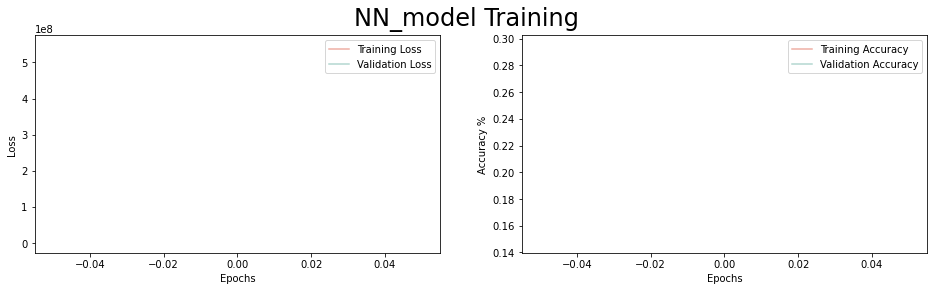

In [4]:
tf.config.run_functions_eagerly(True)
history = resnet.fit(train, validation_data=val, shuffle=True, verbose=1, epochs=1)
plotHistory(history, model_name='ResNet50')